In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("weatherHistory.csv")
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  int64  
 8   Visibility (km)           96453 non-null  float64
 9   Pressure (millibars)      96453 non-null  float64
 10  Daily Summary             96453 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 8.1+ MB


In [3]:
data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


In [5]:
data.isna().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [9]:
data.dropna(inplace = True)

In [10]:
data.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [11]:
data.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            96443, 96444, 96445, 96446, 96447, 96448, 96449, 96450, 96451,
            96452],
           dtype='int64', length=95936)

In [12]:
data.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)        int64
Visibility (km)             float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [13]:
data.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
       'Daily Summary'],
      dtype='object')

In [14]:
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'],utc=True)

In [15]:
data = data.set_index('Formatted Date')
data

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,
2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...
2016-09-09 17:00:00+00:00,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31,16.1000,1014.36,Partly cloudy starting in the morning.
2016-09-09 18:00:00+00:00,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20,15.5526,1015.16,Partly cloudy starting in the morning.
2016-09-09 19:00:00+00:00,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30,16.1000,1015.66,Partly cloudy starting in the morning.


In [16]:
data_column = ['Apparent Temperature (C)', 'Humidity']
resampled_data = data[data_column].resample("M").mean()
resampled_data.head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-31 00:00:00+00:00,-4.050000,0.890000
2006-01-31 00:00:00+00:00,-4.173708,0.834610
2006-02-28 00:00:00+00:00,-2.990716,0.843467
2006-03-31 00:00:00+00:00,1.969780,0.778737
2006-04-30 00:00:00+00:00,12.098827,0.728625


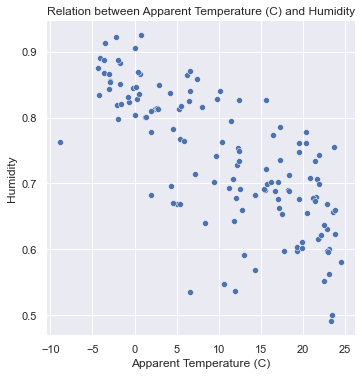

In [17]:
sns.set(style ="darkgrid")
sns.relplot(x ="Apparent Temperature (C)", y ="Humidity", data = resampled_data);
plt.title("Relation between Apparent Temperature (C) and Humidity")
plt.show()


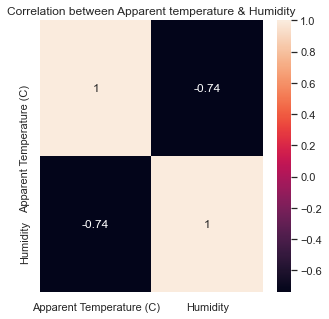

In [18]:
sns.set_style("darkgrid")
plt.figure(figsize=(5,5))
plt.title("Correlation between Apparent temperature & Humidity")
sns.heatmap(data= resampled_data.corr(), annot=True)
plt.show()

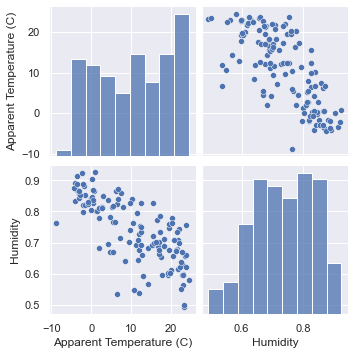

In [19]:
sns.pairplot(resampled_data, kind='scatter')

<AxesSubplot:xlabel='Apparent Temperature (C)', ylabel='Humidity'>

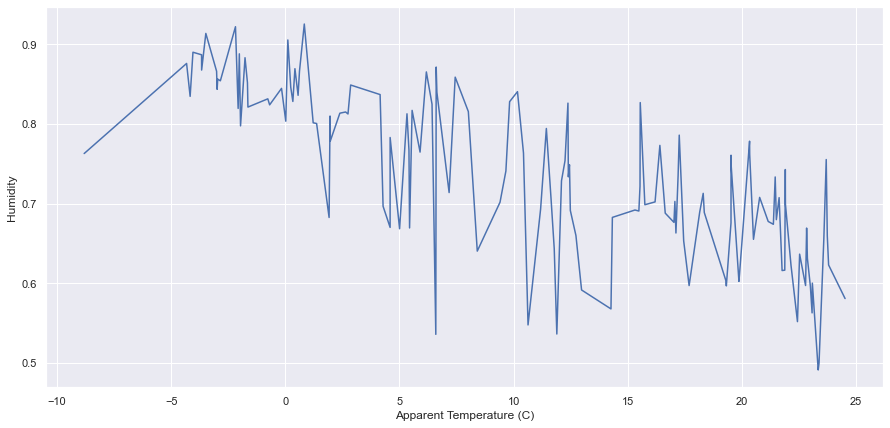

In [20]:
plt.figure(figsize=(15,7))
sns.lineplot(x="Apparent Temperature (C)", y="Humidity", data= resampled_data)


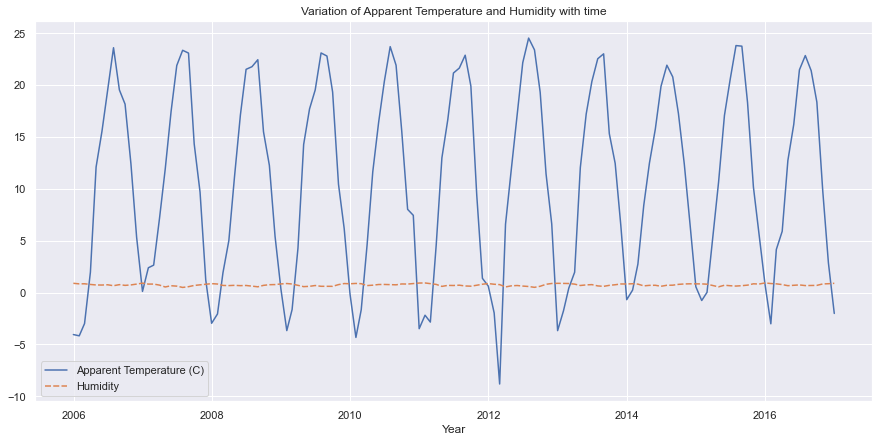

In [21]:
plt.figure(figsize=(15,7))
sns.lineplot(data = resampled_data)
plt.xlabel('Year')
plt.title("Variation of Apparent Temperature and Humidity with time")
plt.show()

In [22]:
data_August=resampled_data[resampled_data.index.month==8]
data_August.head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2006-08-31 00:00:00+00:00,19.528241,0.760753
2007-08-31 00:00:00+00:00,23.079689,0.562876
2008-08-31 00:00:00+00:00,22.438852,0.551895
2009-08-31 00:00:00+00:00,22.794205,0.597231
2010-08-31 00:00:00+00:00,21.906713,0.742786


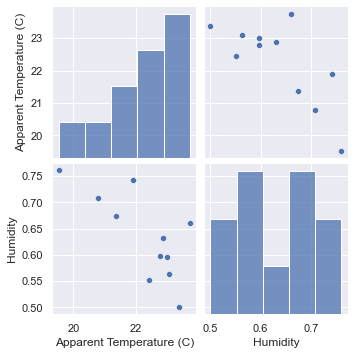

In [23]:
sns.pairplot(data_August,kind="scatter")
plt.show()

In [24]:
January=resampled_data[resampled_data.index.month==1]
February=resampled_data[resampled_data.index.month==2]
March=resampled_data[resampled_data.index.month==3]
April=resampled_data[resampled_data.index.month==4]
May=resampled_data[resampled_data.index.month==5]
June=resampled_data[resampled_data.index.month==6]
July=resampled_data[resampled_data.index.month==7]
August=resampled_data[resampled_data.index.month==8]
September=resampled_data[resampled_data.index.month==9]
October=resampled_data[resampled_data.index.month==10]
November=resampled_data[resampled_data.index.month==11]
December=resampled_data[resampled_data.index.month==12]

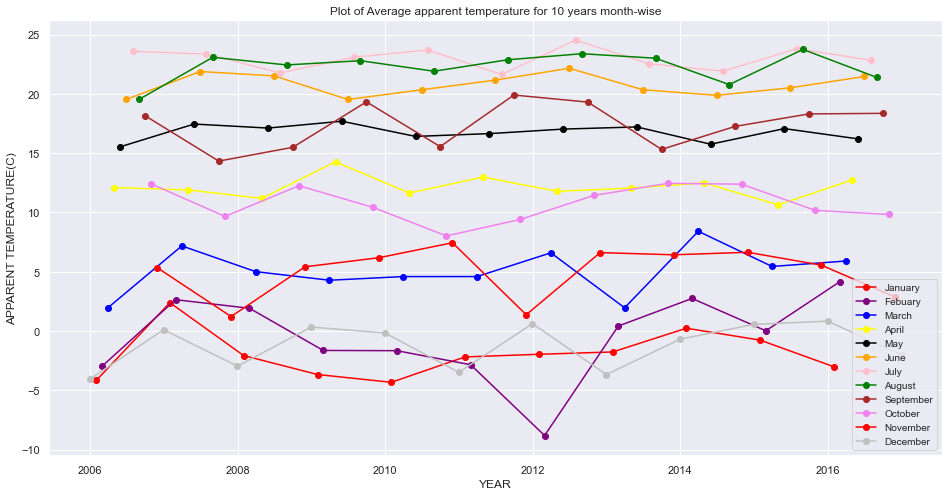

In [25]:
plt.figure(figsize=(16,8))
plt.title("Plot of Average apparent temperature for 10 years month-wise")
plt.xlabel("YEAR")
plt.ylabel("APPARENT TEMPERATURE(C)")
plt.plot(January['Apparent Temperature (C)'],label='January',color='red',marker='o')
plt.plot(February['Apparent Temperature (C)'],label='Febuary',color='purple',marker='o')
plt.plot(March['Apparent Temperature (C)'],label='March',color='blue',marker='o')
plt.plot(April['Apparent Temperature (C)'],label='April',color='yellow',marker='o')
plt.plot(May['Apparent Temperature (C)'],label='May',color='black',marker='o')
plt.plot(June['Apparent Temperature (C)'],label='June',color='orange',marker='o')
plt.plot(July['Apparent Temperature (C)'],label='July',color='pink',marker='o')
plt.plot(August['Apparent Temperature (C)'],label='August',color='green',marker='o')
plt.plot(September['Apparent Temperature (C)'],label='September',color='brown',marker='o')
plt.plot(October['Apparent Temperature (C)'],label='October',color='violet',marker='o')
plt.plot(November['Apparent Temperature (C)'],label='November',color='red',marker='o')
plt.plot(December['Apparent Temperature (C)'],label='December',color='silver',marker='o')

plt.legend(loc=0,fontsize=10)

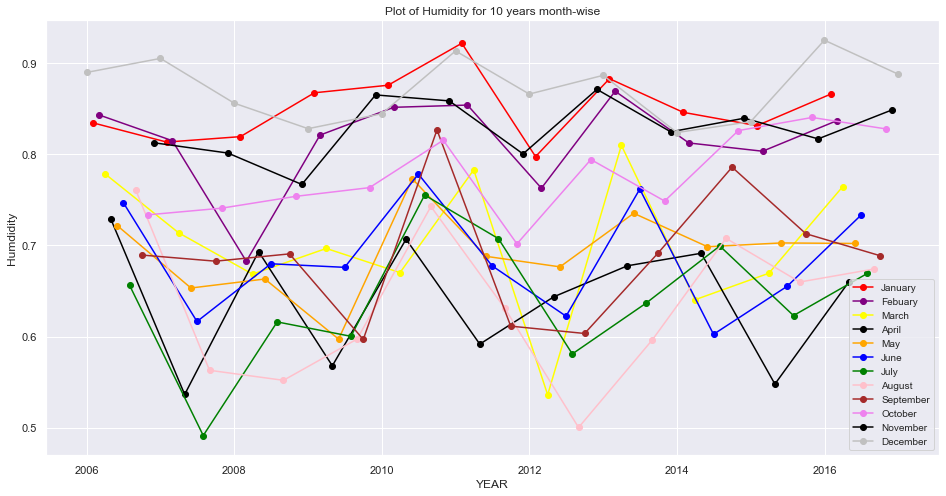

In [27]:
plt.figure(figsize=(16,8))
plt.title("Plot of Humidity for 10 years month-wise")
plt.xlabel("YEAR")
plt.ylabel("Humdidity")
plt.plot(January['Humidity'],label='January',color='red',marker='o')
plt.plot(February['Humidity'],label='Febuary',color='Purple',marker='o')
plt.plot(March['Humidity'],label='March',color='yellow',marker='o')
plt.plot(April['Humidity'],label='April',color='black',marker='o')
plt.plot(May['Humidity'],label='May',color='orange',marker='o')
plt.plot(June['Humidity'],label='June',color='blue',marker='o')
plt.plot(July['Humidity'],label='July',color='green',marker='o')
plt.plot(August['Humidity'],label='August',color='pink',marker='o')
plt.plot(September['Humidity'],label='September',color='brown',marker='o')
plt.plot(October['Humidity'],label='October',color='violet',marker='o')
plt.plot(November['Humidity'],label='November',color='black',marker='o')
plt.plot(December['Humidity'],label='December',color='silver',marker='o')



plt.legend(loc=0,fontsize=10)

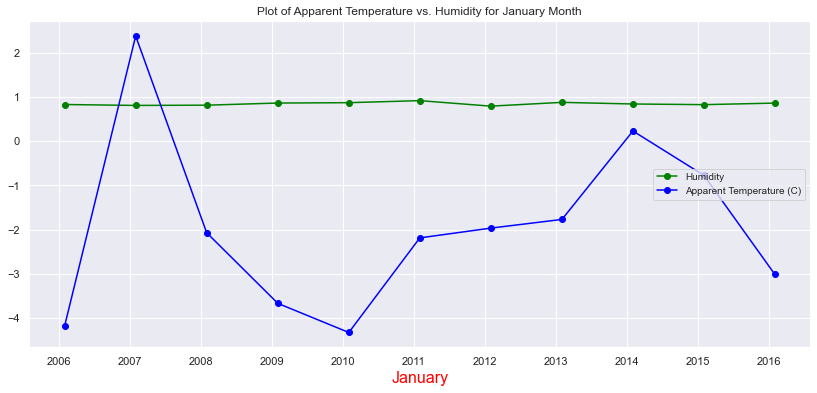

In [62]:
plt.figure(figsize=(14,6))
plt.title("Plot of Apparent Temperature vs. Humidity for January Month")
plt.plot(January['Humidity'],label='Humidity',color='green',marker='o')
plt.plot(January['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='blue',marker='o')
plt.xlabel('January',fontsize=16,color='red')
plt.legend(loc=5,fontsize=10)

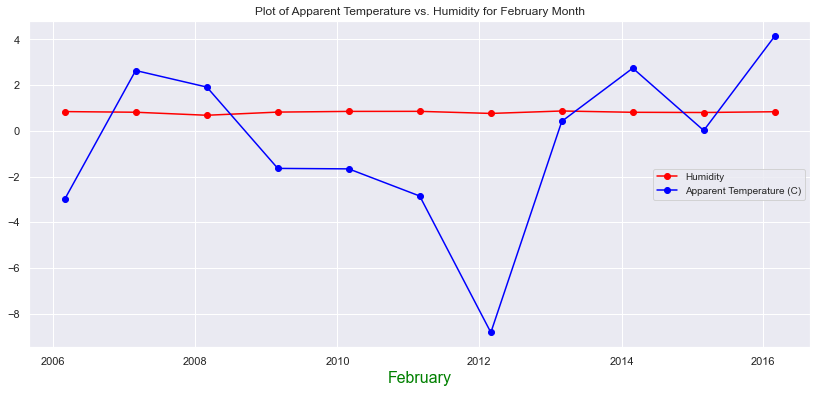

In [74]:
plt.figure(figsize=(14,6))
plt.title("Plot of Apparent Temperature vs. Humidity for February Month")
plt.plot(February['Humidity'],label='Humidity',color='red',marker='o')
plt.plot(February['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='blue',marker='o')
plt.xlabel('February',fontsize=16,color='green')
plt.legend(loc=5,fontsize=10)

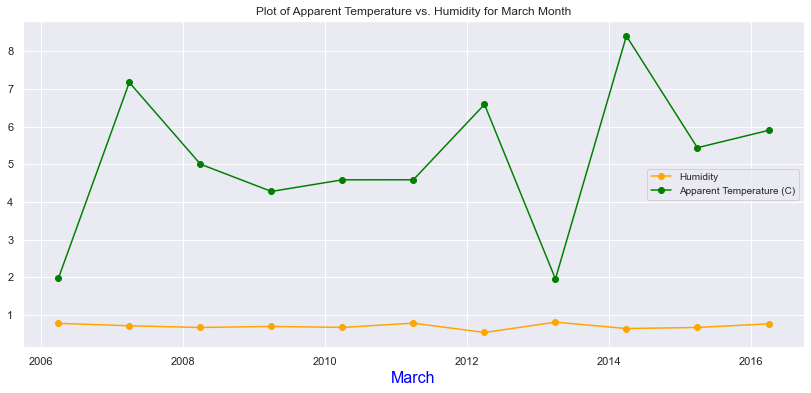

In [75]:
plt.figure(figsize=(14,6))
plt.title("Plot of Apparent Temperature vs. Humidity for March Month")
plt.plot(March['Humidity'],label='Humidity',color='orange',marker='o')
plt.plot(March['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='green',marker='o')
plt.xlabel('March',fontsize=16,color='blue')
plt.legend(loc=5,fontsize=10)

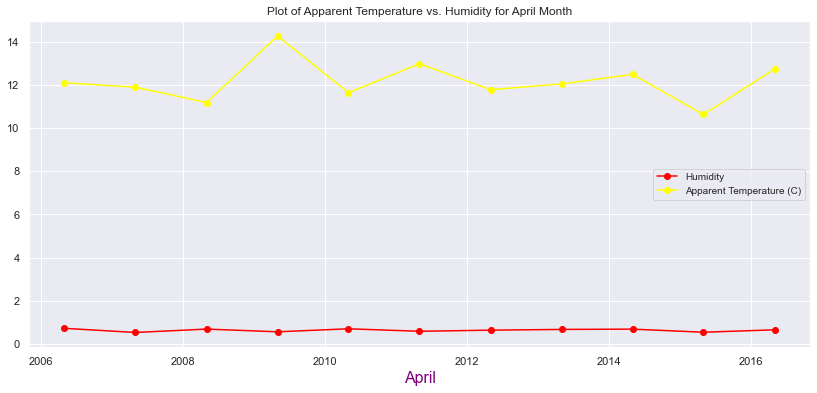

In [76]:
plt.figure(figsize=(14,6))
plt.title("Plot of Apparent Temperature vs. Humidity for April Month")
plt.plot(April['Humidity'],label='Humidity',color='red',marker='o')
plt.plot(April['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='yellow',marker='o')
plt.xlabel('April',fontsize=16,color='Purple')
plt.legend(loc=5,fontsize=10)

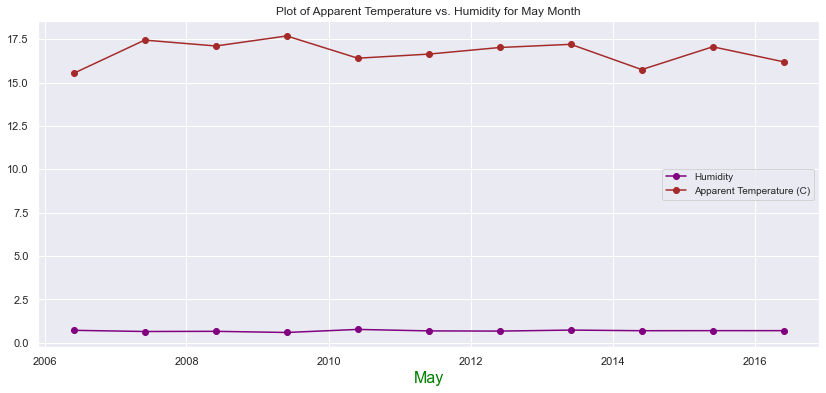

In [78]:
plt.figure(figsize=(14,6))
plt.title("Plot of Apparent Temperature vs. Humidity for May Month")
plt.plot(May['Humidity'],label='Humidity',color='purple',marker='o')
plt.plot(May['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='brown',marker='o')
plt.xlabel('May',fontsize=16,color='green')
plt.legend(loc=5,fontsize=10)

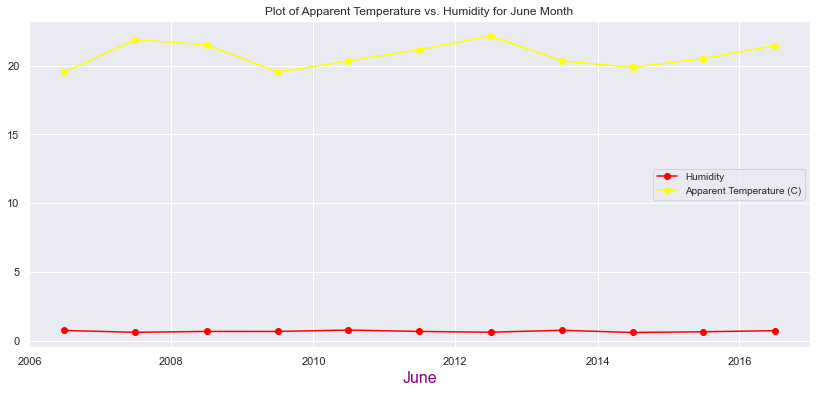

In [79]:
plt.figure(figsize=(14,6))
plt.title("Plot of Apparent Temperature vs. Humidity for June Month")
plt.plot(June['Humidity'],label='Humidity',color='red',marker='o')
plt.plot(June['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='yellow',marker='o')
plt.xlabel('June',fontsize=16,color='purple')
plt.legend(loc=5,fontsize=10)

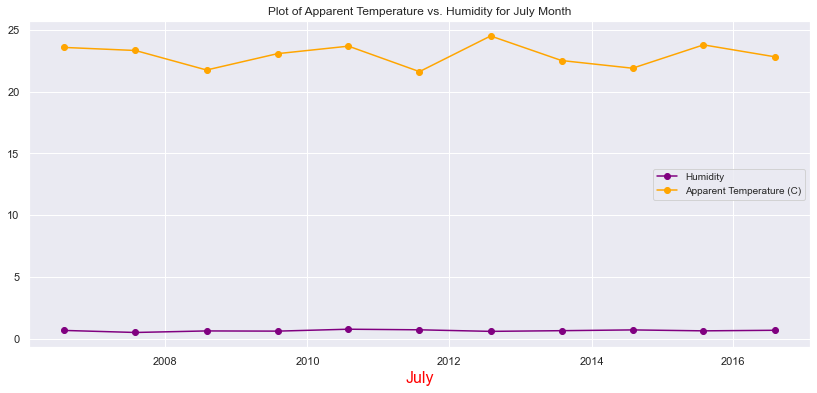

In [68]:
plt.figure(figsize=(14,6))
plt.title("Plot of Apparent Temperature vs. Humidity for July Month")
plt.plot(July['Humidity'],label='Humidity',color='purple',marker='o')
plt.plot(July['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='orange',marker='o')
plt.xlabel('July',fontsize=16,color='red')
plt.legend(loc=5,fontsize=10)

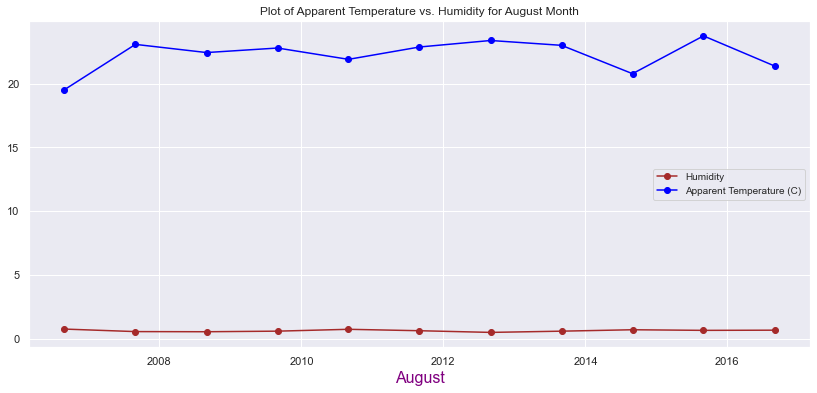

In [69]:
plt.figure(figsize=(14,6))
plt.title("Plot of Apparent Temperature vs. Humidity for August Month")
plt.plot(August['Humidity'],label='Humidity',color='brown',marker='o')
plt.plot(August['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='blue',marker='o')
plt.xlabel('August',fontsize=16,color='purple')
plt.legend(loc=5,fontsize=10)

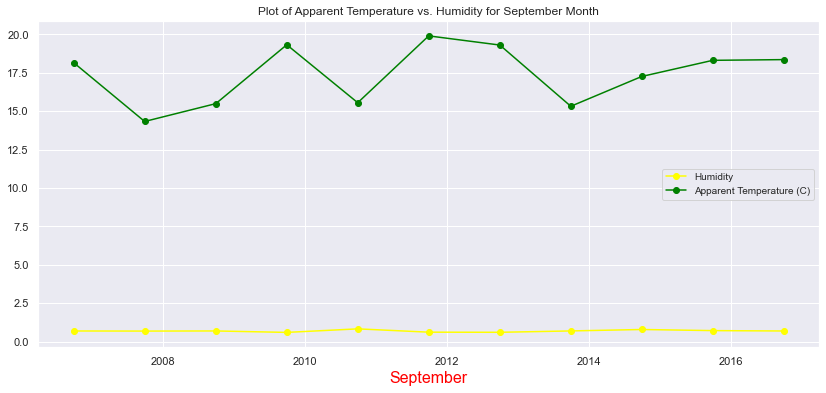

In [70]:
plt.figure(figsize=(14,6))
plt.title("Plot of Apparent Temperature vs. Humidity for September Month")
plt.plot(September['Humidity'],label='Humidity',color='yellow',marker='o')
plt.plot(September['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='green',marker='o')
plt.xlabel('September',fontsize=16,color='red')
plt.legend(loc=5,fontsize=10)

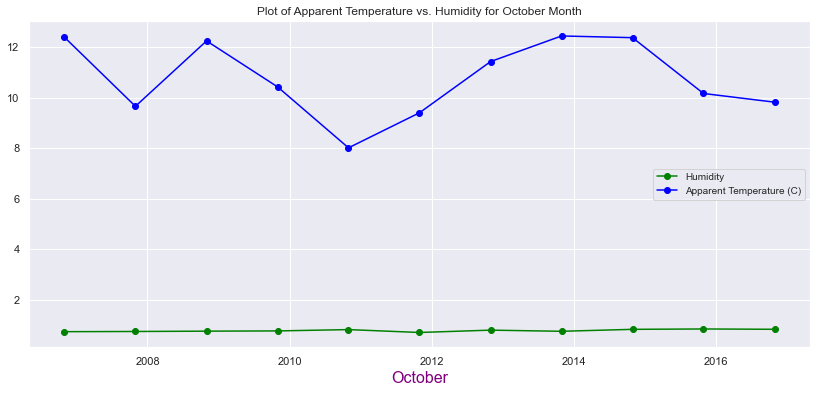

In [71]:
plt.figure(figsize=(14,6))
plt.title("Plot of Apparent Temperature vs. Humidity for October Month")
plt.plot(October['Humidity'],label='Humidity',color='green',marker='o')
plt.plot(October['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='blue',marker='o')
plt.xlabel('October',fontsize=16,color='purple')
plt.legend(loc=5,fontsize=10)

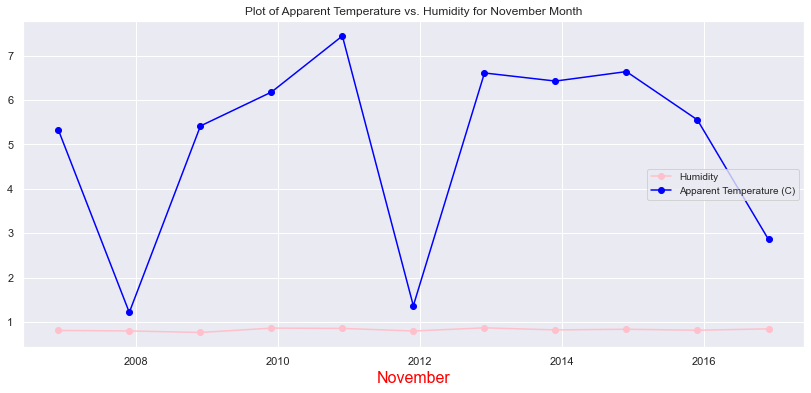

In [72]:
plt.figure(figsize=(14,6))
plt.title("Plot of Apparent Temperature vs. Humidity for November Month")
plt.plot(November['Humidity'],label='Humidity',color='pink',marker='o')
plt.plot(November['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='blue',marker='o')
plt.xlabel('November',fontsize=16,color='red')
plt.legend(loc=5,fontsize=10)

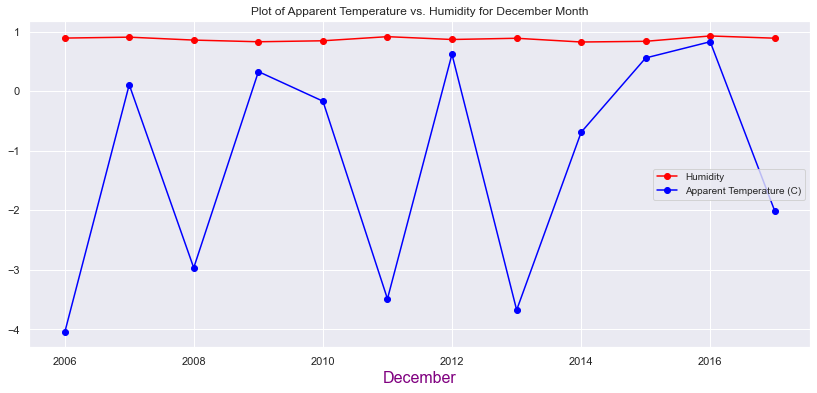

In [73]:
plt.figure(figsize=(14,6))
plt.title("Plot of Apparent Temperature vs. Humidity for December Month")
plt.plot(December['Humidity'],label='Humidity',color='Red',marker='o')
plt.plot(December['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='blue',marker='o')
plt.xlabel('December',fontsize=16,color='Purple')
plt.legend(loc=5,fontsize=10)